# Unified Mentor Data Analytics Internship

Project 2- Financial Analytics

Name- Gayatri Ballal

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df=pd.read_csv("C:/Users/HP/Desktop/Financial Analytics data.csv")

# Data Cleaning

In [3]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


Earlier there are null values and blank cells present in the data then the rows which contains missing value,null value that are removed using Ms excel.Now there is no any missing value preset in the data.

# Data Analysis

In [4]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              365 non-null    int64  
 1   Name               365 non-null    object 
 2   Mar Cap - Crore    365 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.5+ KB


In [5]:
# Display basic statistics
print("Basic statistics of the data:")
print(df.describe())

Basic statistics of the data:
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  365.000000       365.000000         365.000000
mean   250.435616     31300.970301        4395.976849
std    147.106354     67224.641338       11092.206185
min      1.000000      3017.070000          47.240000
25%    133.000000      5089.870000         593.740000
50%    264.000000      9097.330000        1278.300000
75%    363.000000     21372.180000        2840.750000
max    499.000000    583436.720000      110666.930000


In [6]:
# Calculate key metrics
df['Market Cap per Sale'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']
print("Market Cap per Sale:")
print(df['Market Cap per Sale'])

Market Cap per Sale:
0       5.845474
1      18.240676
2      23.465685
3      32.847382
4      17.190535
         ...    
360     4.972851
361     3.834074
362    12.140490
363     5.912302
364     1.062068
Name: Market Cap per Sale, Length: 365, dtype: float64


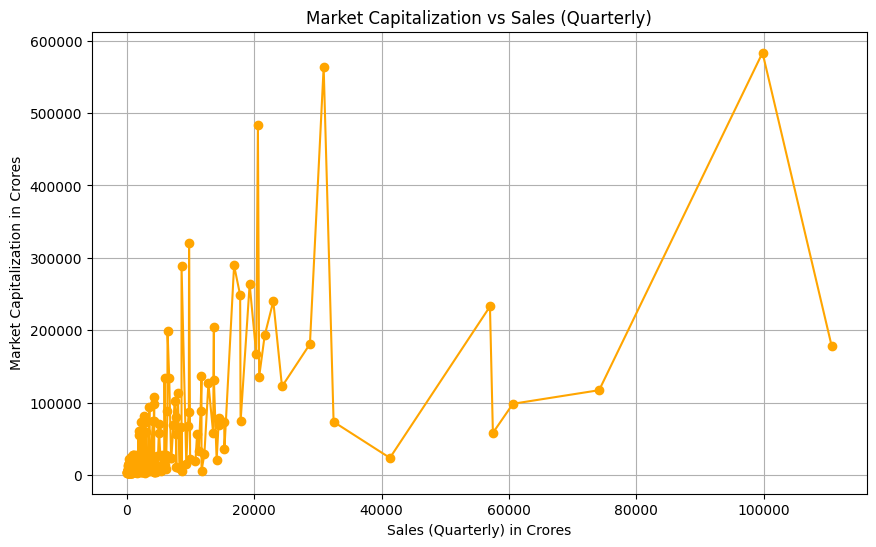

In [7]:
# Sort the DataFrame by Sales Qtr - Crore
df.sort_values(by='Sales Qtr - Crore', inplace=True)

# Plotting Market Capitalization vs. Sales
plt.figure(figsize=(10, 6))
plt.plot(df['Sales Qtr - Crore'], df['Mar Cap - Crore'], marker='o', linestyle='-',color="Orange")
plt.title('Market Capitalization vs Sales (Quarterly)')
plt.xlabel('Sales (Quarterly) in Crores')
plt.ylabel('Market Capitalization in Crores')
plt.grid(True)
plt.show()

This plot shows fluctuating pattern in Market Capitalization despite changes in Quarterly Sales indicates dynamic market conditions and complex relationships between business performance. 

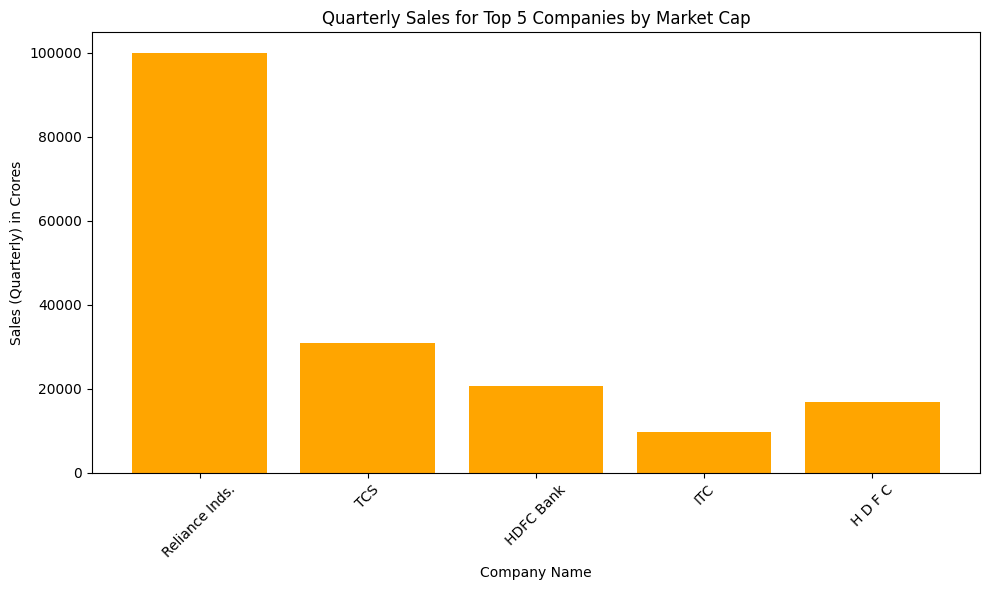

In [8]:
# Sort the DataFrame by Market Capitalization and select top 5 companies
top_5 = df.nlargest(5, 'Mar Cap - Crore')

# Plotting bar plot of Sales Qtr - Crore for top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5['Name'], top_5['Sales Qtr - Crore'], color='orange')
plt.title('Quarterly Sales for Top 5 Companies by Market Cap')
plt.xlabel('Company Name')
plt.ylabel('Sales (Quarterly) in Crores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Reliance Inds.company among the top 5 companies have the highest Quarterly Sales. 

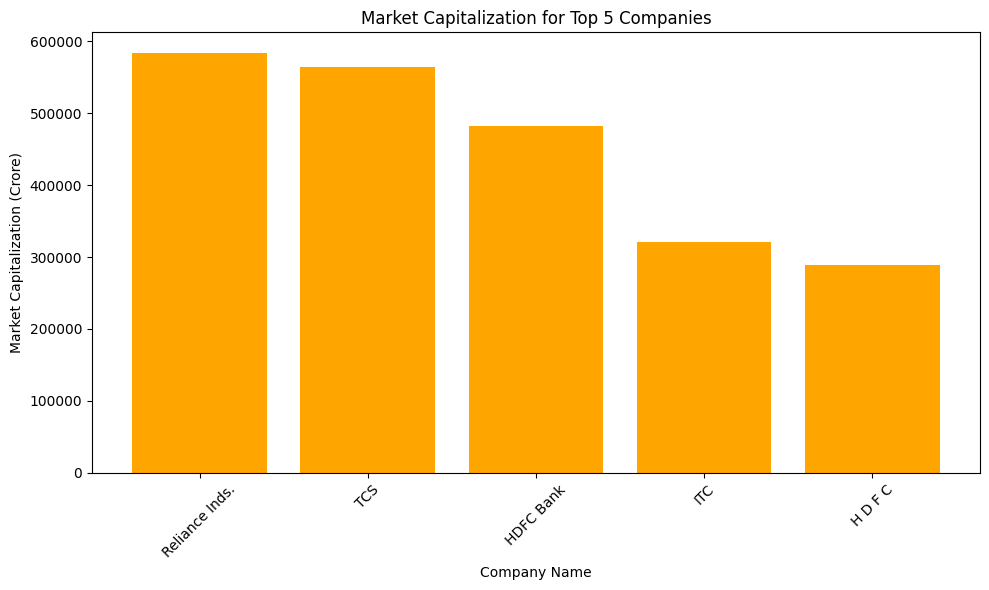

In [9]:
# Plotting bar plot of Mar Cap - Crore for top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5['Name'], top_5['Mar Cap - Crore'], color='orange')
plt.title('Market Capitalization for Top 5 Companies')
plt.xlabel('Company Name')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Reliance Inds.company among the top 5 companies have the highest Market Capitalization. 

Text(0, 0.5, 'Sales (Quarterly) in Crores')

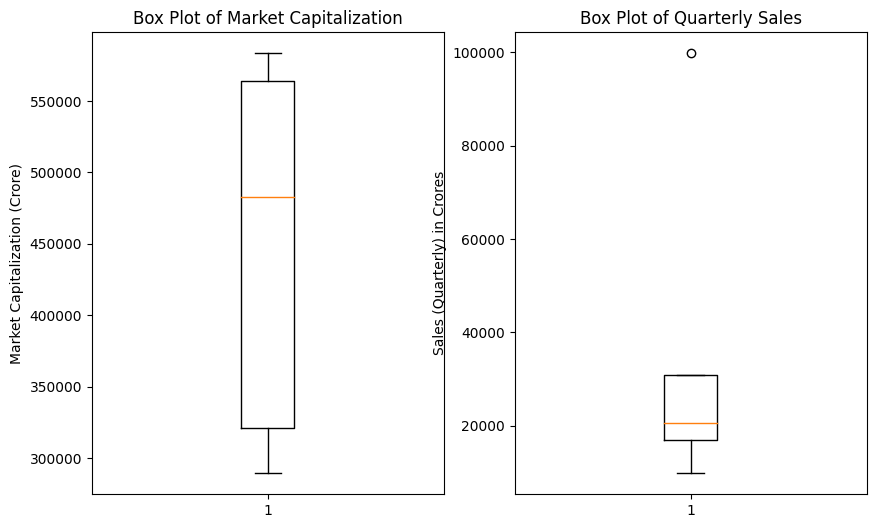

In [10]:
# Create box plot for Market Capitalization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(top_5['Mar Cap - Crore'])
plt.title('Box Plot of Market Capitalization')
plt.ylabel('Market Capitalization (Crore)')

# Create box plot for Quarterly Sales
plt.subplot(1, 2, 2)
plt.boxplot(top_5['Sales Qtr - Crore'])
plt.title('Box Plot of Quarterly Sales')
plt.ylabel('Sales (Quarterly) in Crores')

The first box plot is negatively skewed and second box plot is positively skewed and outlier present in the data.The negatively skewed Market Capitalization distribution indicates concentration towards higher values, while the positively skewed Quarterly Sales distribution implies most values are lower, with outliers present in both datasets.

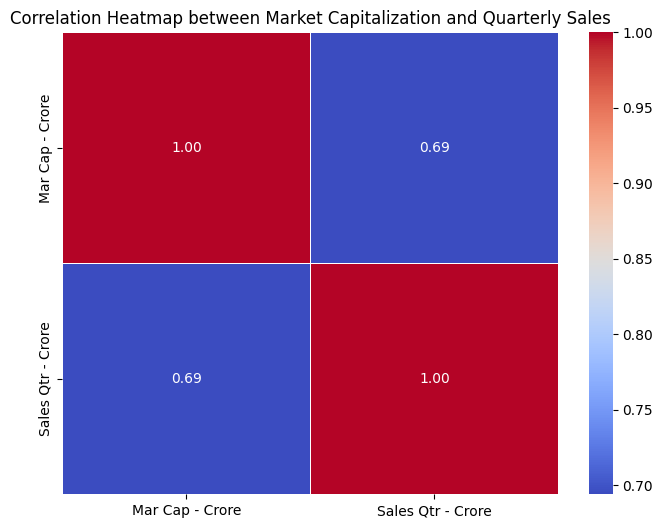

In [11]:
# Calculate the correlation matrix
correlation_matrix = top_5[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Market Capitalization and Quarterly Sales')
plt.show()

Correlation coefficient between Market Capitalization and Quarterly Sales is 0.69 means Market Capitalization and Quarterly Sales are positively correlated.

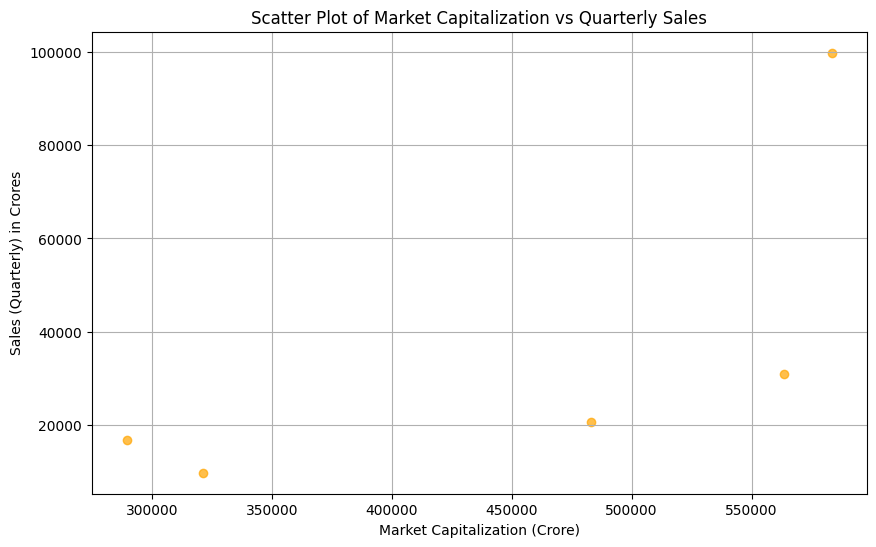

In [12]:
# Sort the DataFrame by Market Capitalization and select top 5 companies
top_5 = df.nlargest(5, 'Mar Cap - Crore')

# Create scatter plot for Market Capitalization vs. Quarterly Sales
plt.figure(figsize=(10, 6))
plt.scatter(top_5['Mar Cap - Crore'], top_5['Sales Qtr - Crore'], color='orange', alpha=0.7)
plt.title('Scatter Plot of Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Sales (Quarterly) in Crores')
plt.grid(True)
plt.show()

 Points cluster around a line it indicates a positive correlation between Market Capitalization and Quarterly Sales.

# Time Series Analysis

In [13]:
#Import the libraries.
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

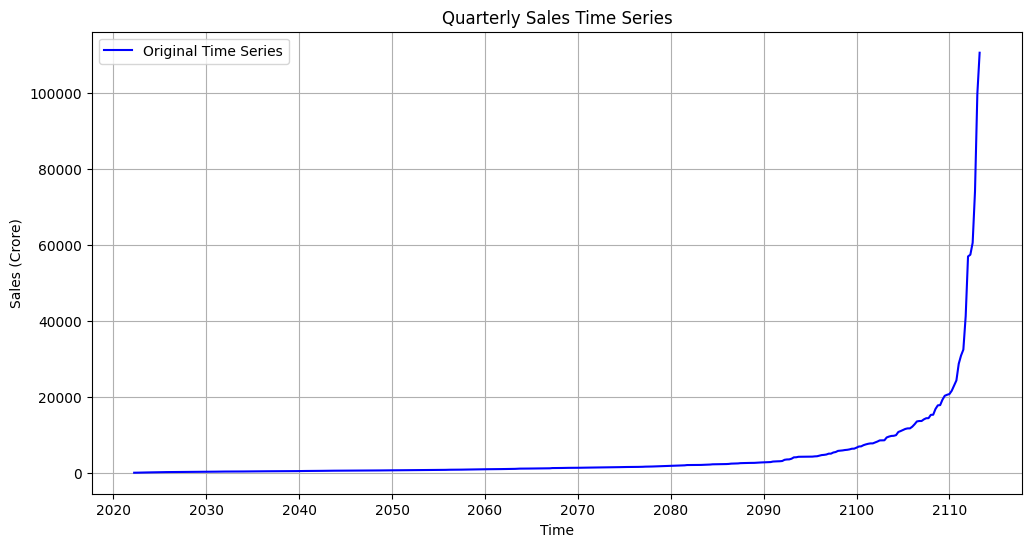

In [14]:
# Convert 'Sales Qtr - Crore' column to a time series
ts_sales = pd.Series(df['Sales Qtr - Crore'].values, index=pd.date_range(start='2022-01-01', periods=len(df), freq='Q'))

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_sales, label='Original Time Series', color='blue')
plt.title('Quarterly Sales Time Series')
plt.xlabel('Time')
plt.ylabel('Sales (Crore)')
plt.legend()
plt.grid(True)
plt.show()

This plot visualizes the Quarterly Sales over time, presenting a time series representation of the sales data.From year 2022 to 2092 there is constant trend of quarterly sales and from 2092 to 2114 there is increasing trend of quarterly sales in the data.

In [15]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(ts_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

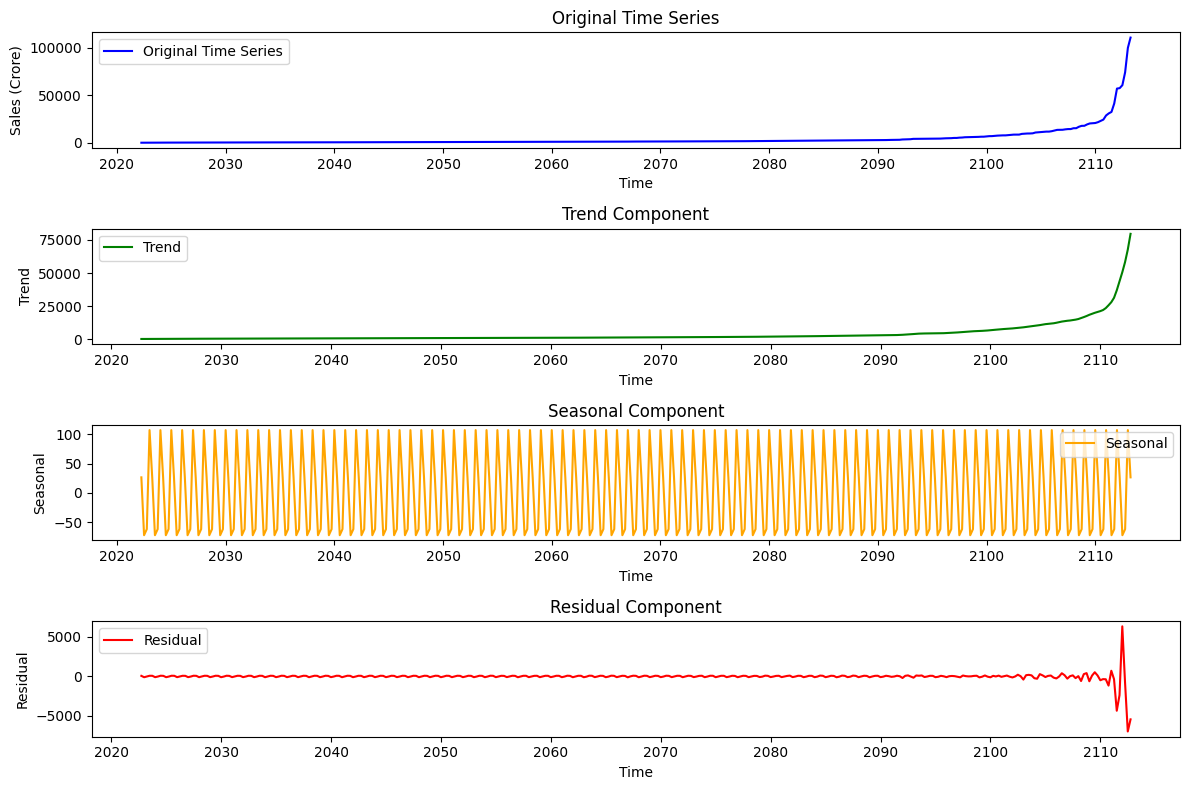

In [16]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(ts_sales, label='Original Time Series', color='blue')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Sales (Crore)')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

1.In the first plot, sales are constant from year 2022 to 2090 and increases from year 2090 to 2110.
2.In the second plot From year 2022 to 209o there is constant trend of quarterly sales and from 2090 to 2114 there is increasing trend of quarterly sales in the data.
3.Seasonal components are centered in the third plot.
4.Fourth plot shows fluctuations in sales with respect to time. 

In [17]:
# Fit ARIMA model and make forecasts
model = ARIMA(ts_sales, order=(1,1,1))  # ARIMA(1,1,1) model
model_fit = model.fit()

In [18]:
# Forecast next 10 periods
forecast = model_fit.forecast(steps=10)
forecast

2113-06-30    112703.026123
2113-09-30    113623.432072
2113-12-31    114039.496471
2114-03-31    114227.576073
2114-06-30    114312.596413
2114-09-30    114351.029385
2114-12-31    114368.402797
2115-03-31    114376.256352
2115-06-30    114379.806507
2115-09-30    114381.411336
Freq: Q-DEC, Name: predicted_mean, dtype: float64

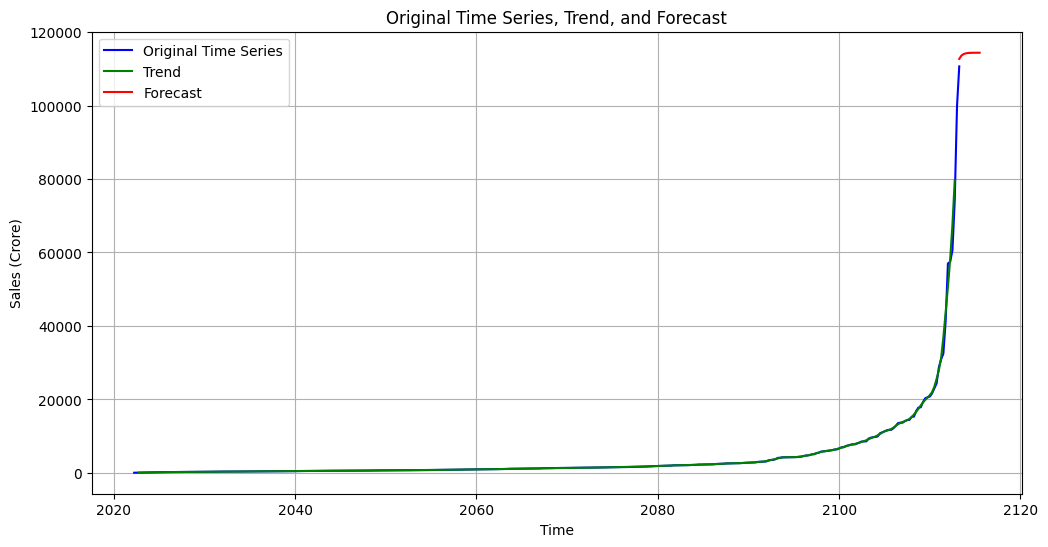

In [19]:
# Plot original time series, trend, and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_sales, label='Original Time Series', color='blue')
plt.plot(trend, label='Trend', color='green')
forecast_index = pd.date_range(start=ts_sales.index[-1], periods=10, freq='Q')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Original Time Series, Trend, and Forecast')
plt.xlabel('Time')
plt.ylabel('Sales (Crore)')
plt.legend()
plt.grid(True)
plt.show()

The blue line represents the original time series data, showing the historical sales amounts over time.Sales constant from 2022 to year 2080 then increases fromyear 2080 to 2113.The green line represents the trend component of the time series, indicating the underlying long-term movement or directionality in the sales data.The red line represents the forecasted values for future periods, based on the ARIMA model fitted to the time series data. These forecasted values provide insights into the expected sales amounts in the upcoming quarters.

In [20]:
# Calculate Mean Squared Error (MSE) of the forecast
mse = mean_squared_error(ts_sales[-10:], forecast)
print('Mean Squared Error (MSE) of the forecast:', mse)

Mean Squared Error (MSE) of the forecast: 3711441756.876704
